In [6]:
#Question 1
#Import the dataset and write a description about the dataset

#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [51]:
#choose dataset to import
print('Enter \n 1. White wine quality \n 2. Bike sharing \n 3. House price prediction \n 4. Titanic')
ch = input('Enter choice 1,2,3,4 \n')

Enter 
 1. White wine quality 
 2. Bike sharing 
 3. House price prediction 
 4. Titanic
Enter choice 1,2,3,4 
4


In [80]:
#loading dataset 
if ch == '1':
    url = 'winequality-white.csv'
    df = pd.read_csv(url , sep = ';')
    print('White wine quality')
elif ch == '2':
    url = 'Bike-Sharing-Dataset\day.csv'
    df = pd.read_csv(url)
    print('Bike sharing')
elif ch == '3':
    url = 'https://raw.githubusercontent.com/Shreyas3108/house-price-prediction/master/kc_house_data.csv'
    df = pd.read_csv(url)
    print('House price pridiction')
elif ch == '4':
    url = 'titanic'
    df = sns.load_dataset(url)
    print('Titanic')
else:
    print('Wrong input')
    df = 'Null'

Titanic


In [81]:
#type of data
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [82]:
#row,column
df.shape

(891, 15)

In [83]:
#rows
df.index

RangeIndex(start=0, stop=891, step=1)

In [84]:
#columns
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [85]:
#info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [86]:
#basic statistic description of dataset
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [87]:
#boolean and object description of dataset
df.describe(include = ['bool' , 'object'])

,sex,embarked,who,adult_male,embark_town,alive,alone
count,891,889,891,891,889,891,891
unique,2,3,3,2,3,2,2
top,male,S,man,True,Southampton,no,True
freq,577,644,537,537,644,549,537


In [88]:
#Question 2
#Find the count of the missing values and describe how you have handled the missing data

#counting missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [221]:
#replaceing Nan with U in embarked
df['embarked'] = df['embarked'].fillna('U')
#replaceing Nan with Unknown in embark_town
df['embark_town'] = df['embark_town'].fillna('Unknown')
#find mean age and replace it with Nan values in age column 
age = df['age'].mean()
print('Mean age = ' , age)
df['age'] = df['age'].fillna(age)
#drop deck column with max Nan values and save new dataset in df1
df1 = df.dropna(axis = 1)

Mean age =  29.699117647058763


In [100]:
#checking for Nan values after cleaning data
df1.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [102]:
#Question 3
#Univariate Analysis-Plot the univariate graphs and find the outliers.Explain how you have handled the outliers by transformation

#non graphical
#describe data
df1.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [103]:
df1.describe(include = ['bool' , 'object'])

,sex,embarked,who,adult_male,embark_town,alive,alone
count,891,891,891,891,891,891,891
unique,2,4,3,2,4,2,2
top,male,S,man,True,Southampton,no,True
freq,577,644,537,537,644,549,537


In [104]:
#count values of categorical data
df1['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [105]:
df1['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [106]:
df1['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [110]:
df1['alive'].value_counts()

no     549
yes    342
Name: alive, dtype: int64

In [111]:
df1['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Unknown          2
Name: embark_town, dtype: int64

In [112]:
df1['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [114]:
df1['adult_male'].value_counts()

True     537
False    354
Name: adult_male, dtype: int64

In [115]:
df1['alone'].value_counts()

True     537
False    354
Name: alone, dtype: int64

In [116]:
df1['who'].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

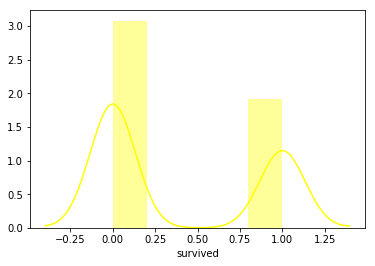

In [165]:
#graphical
#quantative
#plots histogram and kde of dead -0 , alive -1 vs their frequency
sns.distplot(df1['survived'] , color = 'yellow' , hist = True , rug = False , kde = True)
plt.show()

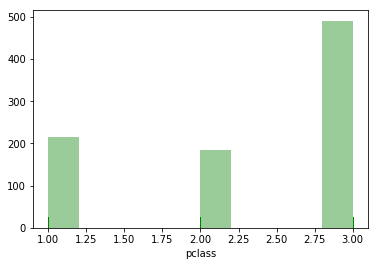

In [136]:
#plots histogram and rug of passenger class 1,2,3 vs their frequency
sns.distplot(df1['pclass'] , color = 'g' , hist = True , rug = True , kde = False)
plt.show()

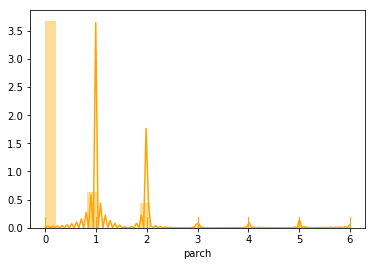

In [145]:
#plots histogram kde and rug of parch vs their frequency
sns.distplot(df1['parch'] , color = 'orange' , hist = True , rug = True , kde = True)
plt.show()

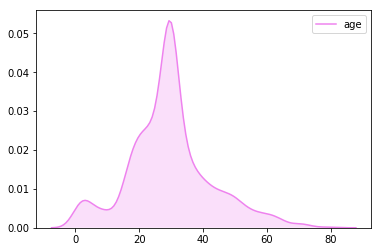

In [155]:
#plots kde of age -> shows age distribution of passengers
sns.kdeplot(df1['age'] , color = 'violet' , shade = True)
plt.show()

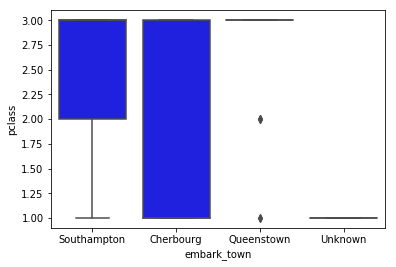

In [173]:
#plots relation between class of passenger and which town they belong to
sns.boxplot(x = df1['embark_town'] , y = df1['pclass'] , color = 'blue')
plt.show()

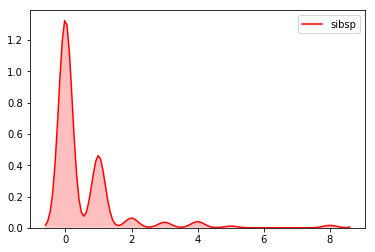

In [153]:
#plots distribution of siblings on board
sns.kdeplot(df1['sibsp'] , color = 'red' , shade = True)
plt.show()

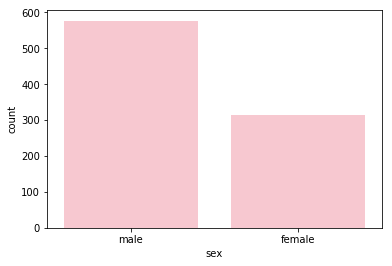

In [167]:
#categorical
#shows count of male and female passengers
sns.countplot(df1['sex'] , color = 'pink')
plt.show()

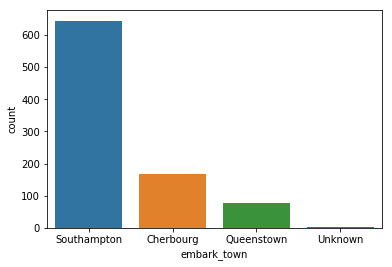

In [158]:
#shows count of people from different town
sns.countplot(df1['embark_town'])
plt.show()

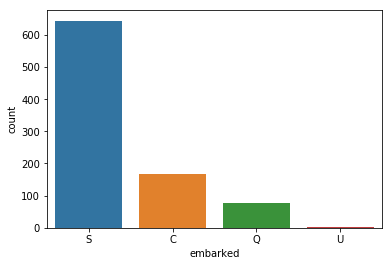

In [159]:
#shows count of people from different town code
sns.countplot(df1['embarked'])
plt.show()

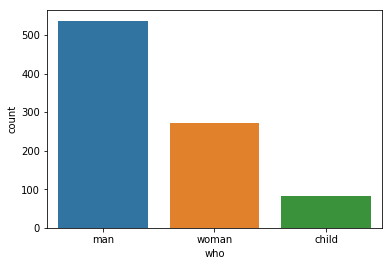

In [161]:
#shows count of men women and childen
sns.countplot(df1['who'])
plt.show()

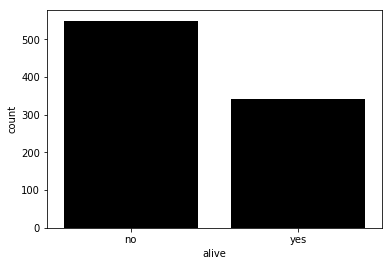

In [168]:
#shows count of alive vs dead people
sns.countplot(df1['alive'] , color = 'black')
plt.show()

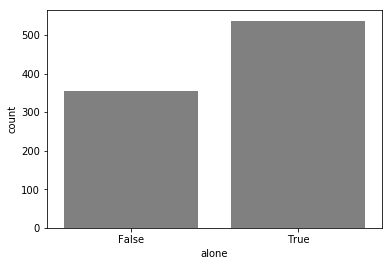

In [169]:
#shows count of people travelling alone
sns.countplot(df1['alone'] , color = 'grey')
plt.show()

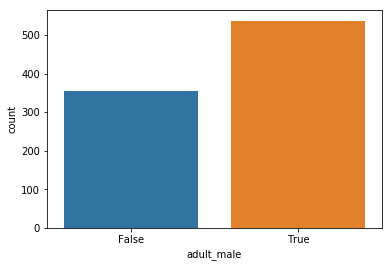

In [166]:
#shows count of all adult males on board
sns.countplot(df1['adult_male'])
plt.show()

In [187]:
#Question 4
#Bivariate Analysis
#Plot the bivariate graphs and find the relationship between the variables. Explain your findings and inference of the graphs

#graphical
#contingency table
pd.crosstab(df1['sex'] , df1['survived'])

survived,0,1
sex,,
female,81,233
male,468,109


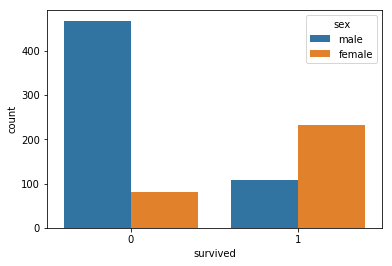

In [188]:
#shows gender of people who survived
sns.countplot(x = 'survived' , hue = 'sex' , data = df1)
plt.show()

In [189]:
#contingency table
pd.crosstab(df1['who'] , df1['alive'])

alive,no,yes
who,,
child,34,49
man,449,88
woman,66,205


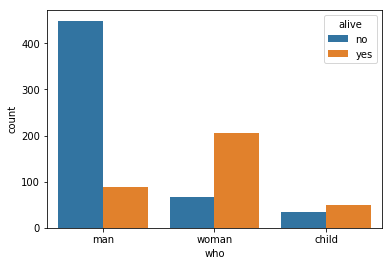

In [190]:
#shows count of men wome and children and their alive/dead status
sns.countplot(x = 'who' , hue = 'alive' , data = df1)
plt.show()

In [207]:
#contingency table
pd.crosstab(df1['embark_town'] , df1['age'])

age,0.42,0.67,0.75,0.83,0.92,1.0,2.0,3.0,4.0,5.0,...,62.0,63.0,64.0,65.0,66.0,70.0,70.5,71.0,74.0,80.0
embark_town,,,,,,,,,,,,,,,,,,,,,
Cherbourg,1,0,2,0,0,2,0,1,1,1,...,0,0,0,1,0,0,0,2,0,0
Queenstown,0,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
Southampton,0,1,0,2,1,5,9,5,8,3,...,3,2,2,1,1,2,0,0,1,1
Unknown,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


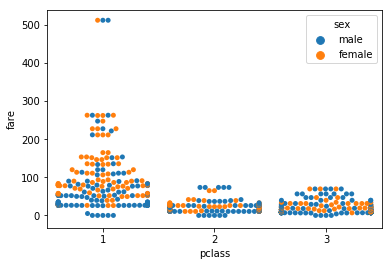

In [208]:
#show which gender of which class paid how much fare
sns.swarmplot(x = 'pclass' , y = 'fare' , hue = 'sex' , data = df1)
plt.show()

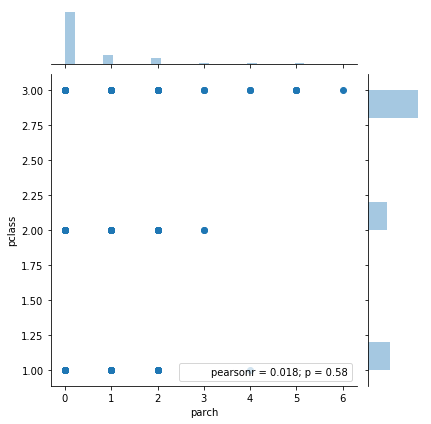

In [212]:
#shows relation b/w passenger class and parch 
sns.jointplot(x = 'parch' , y = 'pclass' , data = df1)
plt.show()

          survived    pclass       age     sibsp     parch      fare
survived  1.000000 -0.338481 -0.069809 -0.035322  0.081629  0.257307
pclass   -0.338481  1.000000 -0.331339  0.083081  0.018443 -0.549500
age      -0.069809 -0.331339  1.000000 -0.232625 -0.179191  0.091566
sibsp    -0.035322  0.083081 -0.232625  1.000000  0.414838  0.159651
parch     0.081629  0.018443 -0.179191  0.414838  1.000000  0.216225
fare      0.257307 -0.549500  0.091566  0.159651  0.216225  1.000000


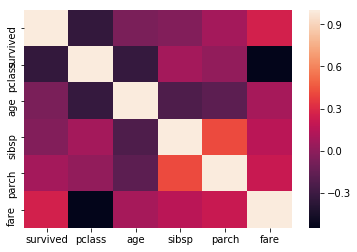

In [222]:
#Question 5
#Multivariate Analysis
#Plot the multivariate graphs and find the relationship between the variables. Explain your findings and inference of the graphs

#graphical
#karl pearson corelation matrix
numerical = ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']
corr_matrix = df[numerical].corr()
print(corr_matrix)
#heatmap of corelation
sns.heatmap(corr_matrix)
plt.show()

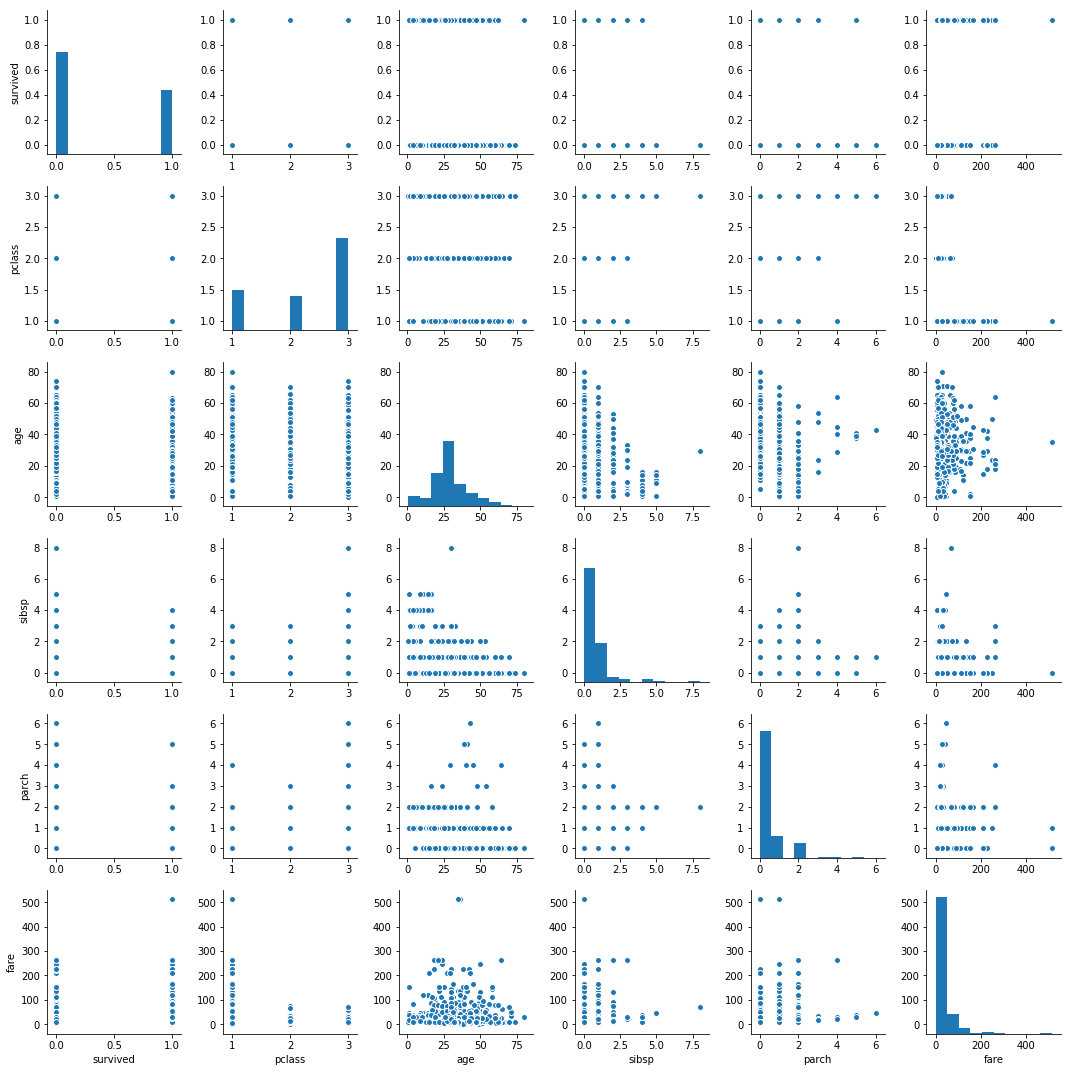

In [220]:
#plots all possible combinations of numerical list
sns.pairplot(df[numerical])
plt.show()

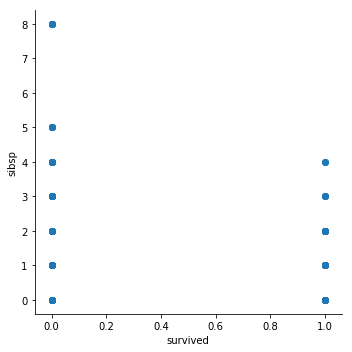

In [231]:
#plots scatter graph -> no of siblings that survived
sns.lmplot(x = 'survived' , y = 'sibsp' , data = df1 , fit_reg = False)
plt.show()

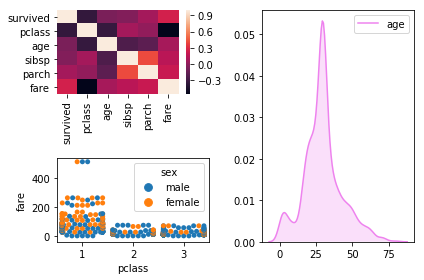

In [244]:
#Question 6
#Final Plots – Select 3 most interesting graphs from the above analysis and describe why those graphs are chosen

plt.subplot(221)
sns.heatmap(corr_matrix)
plt.subplot(223)
sns.swarmplot(x = 'pclass' , y = 'fare' , hue = 'sex' , data = df1)
plt.subplot(122)
sns.kdeplot(df1['age'] , color = 'violet' , shade = True)
plt.tight_layout()
plt.show()

according to me these three graphs were the most interesting ones because
1. represents a heat map of karl pearson corelation values. shows relationship b/w various variables
2. shows class wise fare of passengers based on gender
3. distribution of age of people onboard